## word2vec と doc2vec

単語や文章を分散表現（意味が似たような単語や文章を似たようなベクトルとして表現）を取得します。

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/scipy/template/template_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/scipy/template/template_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G6032


In [2]:
!python -V

Python 3.8.5


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)

matplotlib version : 3.3.2
scipy version : 1.5.2
numpy version : 1.18.5


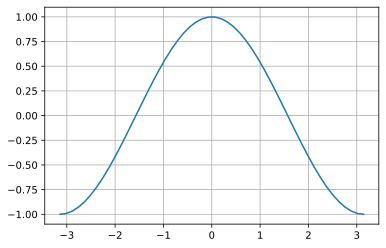

In [4]:
x = np.linspace(-np.pi, np.pi).reshape(-1,1)
t = np.cos(x)

plt.plot(x,t)
plt.grid()
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation='sigmoid'))
model.add(Dense(n_out, activation='linear'))
model.compile(loss="mean_squared_error", optimizer='sgd')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x, t, batch_size=batch_size, epochs=10, validation_split=0.1, verbose=0)

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']

<function matplotlib.pyplot.show(close=None, block=None)>

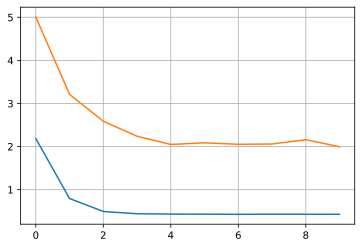

In [9]:
plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(val_loss)), val_loss)
plt.grid()
plt.show

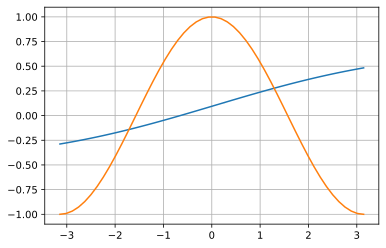

In [10]:
plt.plot(x, model.predict(x))
plt.plot(x, t)
plt.grid()
plt.show()

#### TODO: epoch以前のグラフを示そう！

In [26]:
x = np.linspace(-np.pi, np.pi).reshape(-1,1)
t = np.cos(x)

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation='sigmoid'))
model.add(Dense(n_out, activation='linear'))
model.compile(loss="mean_squared_error", optimizer='sgd')


def a(epochs):

  
  history = model.fit(x, t, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  
  plt.plot(x, model.predict(x), label='epochs = {}'.format(epochs))
  plt.plot(x, t, label='correct data')
  plt.legend()
  plt.grid()
  plt.show()

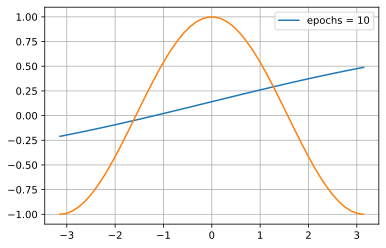

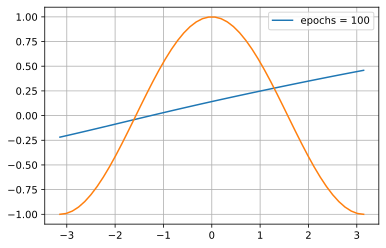

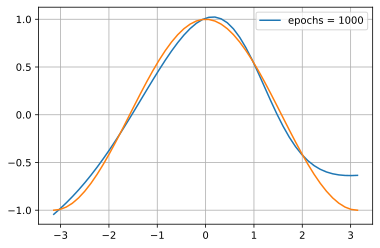

In [24]:
a(10)
a(100)
a(1000)